

---


# **Prediction with ML models**
#### ***Correlation between after-hours twitter data and movement of individual company stock price on a daily basis***


---



**Final Project**
CSCI 49362/76000   |   Fall 2020 

##### Hannah Do, Andrew Lee, Phillip Chen







In [1]:
# Import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

import datetime, string, re
import sys, os

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from collections import Counter

print('All Libraries Sucessfully Imported')

All Libraries Sucessfully Imported


In [8]:

companies = ['microsoft', 'facebook', 'google', 'amazon', 'apple']


---
**1. Importing saved csv files for each company**

In [6]:
# Create a function with many machine learning models 
def models(X_train, X_test, y_train, y_test):

    list1 = []
    
    #Use Logistic regression & Cross Validation with different parameters
    param_grid = {'penalty': ['l1', 'l2', 'elasticnet','none'], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"], 'dual':[bool, False], 'C':[0.001, 0.1, 1, 10, 100], 'max_iter':[1, 500, 10000]}
    lr = LogisticRegression(multi_class='ovr')
    lr = GridSearchCV(lr, param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
    lr.fit(X_train, y_train)

    params_optimal = lr.best_params_

    log = LogisticRegression(multi_class='ovr', **params_optimal)
#     log = LogisticRegression(multi_class='ovr')

    log.fit(X_train, y_train)
    y_pred=log.predict(X_test)

    logistic_acc=accuracy_score(y_test, y_pred)
    list1.append(logistic_acc)

    
    #Use KNeighbors & Cross Validation with different parameters
    param_grid = {'n_neighbors': [3, 5, 10], 'p': [1, 5, 10, 100], 'weights': ["uniform", "distance"]}
    knn = KNeighborsClassifier()
    knn = GridSearchCV(knn, param_grid, scoring='f1_micro', cv=5, verbose=1, n_jobs=-1)
    knn.fit(X_train, y_train)
    params_optimal = knn.best_params_
    
    knn_optimal = KNeighborsClassifier(**params_optimal)
#     knn_optimal = KNeighborsClassifier()

    knn_optimal.fit(X_train, y_train)
    y_pred=knn_optimal.predict(X_test)

    knn_acc=accuracy_score(y_test, y_pred)
    list1.append(knn_acc)
    

    #Use SVC (RBF kernal)
    svc_rbf = SVC(kernel='rbf', random_state = 4)
    svc_rbf.fit(X_train, y_train)
    y_pred=svc_rbf.predict(X_test)

    svc_rbf_acc=accuracy_score(y_test, y_pred)
    list1.append(svc_rbf_acc)

    
    #Use GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    y_pred=gauss.predict(X_test)

    gauss_acc=accuracy_score(y_test, y_pred)
    list1.append(gauss_acc)

    
    #Use Decision Tree
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
    y_pred=tree.predict(X_test)

    tree_acc=accuracy_score(y_test, y_pred)
    list1.append(tree_acc)


    #Use the RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, y_train)
    y_pred=forest.predict(X_test)

    forest_acc=accuracy_score(y_test, y_pred)
    list1.append(forest_acc)
 
    return list1

In [9]:

final_table = pd.DataFrame()

for f in companies:

    list0 = []
    
    temp = pd.read_csv(f + "_scaled.csv", index_col= None, header = None)

    temp = temp.drop([0], axis=1)
    # drop NaN column with index values

#     temp = temp.drop([0, 8, 9], axis=1)
    # dropping lowest importance features
#     temp = temp.drop([0, 3, 4], axis=1)
    # dropping NASDAQ for comparison

    temp.columns = temp.iloc[0]
    temp = temp[1:] 
    # make first row as column names

    y = temp['target']
    temp = temp.drop(f + ' stock', axis=1)
    X = temp.drop('target', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    list0 = models(X_train, X_test, y_train, y_test)
    
    final_table[f] = list0
    
final_table

Fitting 10 folds for each of 600 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2353 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 4604 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 600 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2363 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 4946 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  1.1min finished
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.p

/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 600 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 4880 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  1.8min finished
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.p

/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search

/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/doguma/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 600 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2360 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 4820 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 600 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2652 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 5328 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.5s finished


,microsoft,facebook,google,apple
0,0.769231,0.923077,0.692308,0.923077
1,0.538462,0.461538,0.384615,0.615385
2,0.615385,0.692308,0.615385,0.615385
3,0.846154,0.846154,0.769231,0.692308
4,0.846154,0.846154,0.615385,0.846154
5,0.923077,0.846154,0.846154,0.846154


In [10]:
ml_models = ['Logistic Regression', 'KNN', 'SVC-rbf', 'Gaussian NB', 'Decision Tree', 'Random Forest']
final_table.index = ml_models

final_table

,microsoft,facebook,google,apple
Logistic Regression,0.769231,0.923077,0.692308,0.923077
KNN,0.538462,0.461538,0.384615,0.615385
SVC-rbf,0.615385,0.692308,0.615385,0.615385
Gaussian NB,0.846154,0.846154,0.769231,0.692308
Decision Tree,0.846154,0.846154,0.615385,0.846154
Random Forest,0.923077,0.846154,0.846154,0.846154


No handles with labels found to put in legend.


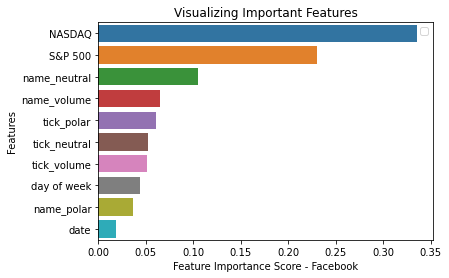

In [7]:
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train, y_train)
# y_pred=forest.predict(X_test)

feature_imp = pd.Series(forest.feature_importances_,index=X_train.columns).sort_values(ascending=False)

# selected_feat= X.columns[(sel.get_support())]


# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score - Facebook')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()